In [3]:
from lblcrn.bulk_crn import *
from lblcrn.crn_sym import *
from lblcrn.bulk_crn.xps_io import *
from lblcrn.bulk_crn.solution_system import *

import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
import seaborn as sb
import scipy.signal as signal
from mpl_toolkits.axes_grid1 import ImageGrid


In [4]:
# 1e-6_rt
sols = []
sm = SpeciesManager()

#[535.0 , 532.2 , 530.9 , 530.0 , 531.6 ,  531.6 ,  533.2, 535.0]
#[y1, x2, x3, x4, x53, x54, x6, x7]
y1 = sm.sp('y1', Orbital('1s', 535.0))
x2 = sm.sp('x2', Orbital('1s', 532.2))
x3 = sm.sp('x3', Orbital('1s', 530.9))
x4 = sm.sp('x4', Orbital('1s', 530.0))
x53 = sm.sp('x53', Orbital('1s', 531.6))
x54 = sm.sp('x54', Orbital('1s', 531.6))
x6 = sm.sp('x6', Orbital('1s', 533.2))
x7 = sm.sp('x7', Orbital('1s', 535.0))

multipliers = [0.1, 0.5, 1, 5, 10]
default_rxn_consts = [0.000039, 0.000017, 6.220646, 0.1607555, 0.299507, 0.167130, 0.794455, 0.000006, 0.300480, 0.127713, 0.000013, 0.394500, 0.000960, 76.964514]

# System Solving

In [6]:
# Test code that will be moved into a module
for i in range(len(default_rxn_consts)):
    for j in range(5):
        scaled = list(default_rxn_consts)
        scaled[i] *= multipliers[j]
        
        rsys = RxnSystem(
            Rxn(x4 + y1, x54, scaled[0]), # 0
            Rxn(x3 + y1, x53, scaled[1]), # 1
            Rxn(x54, x3 + x3, scaled[2]), # 2
            Rxn(x3 + x3, x54, scaled[3]), # 3
            Rxn(x53, x2 + x3, scaled[4]), # 4
            Rxn(x54, x2 + x4, scaled[5]), # 5
            Rxn(x2, y1, scaled[6]), # 6
            Rxn(y1, x2, scaled[7]), # 7
            Rxn(x53, y1 + x3, scaled[8]), # 8
            Rxn(x54, x4 + y1, scaled[9]), # 9
            Rxn(x53 + y1, x6, scaled[10]), # 10
            Rxn(x6, x53 + y1, scaled[11]), # 11
            Rxn(x4 + x4, x7, scaled[12]), # 12
            Rxn(x7, x4 + x4, scaled[13]), # 13
            Conc(y1, 1.0),
            Conc(x4, 0.25),
            sm
        )
        s = simulate_xps(rsys, time=10000)
        sols.append(s)
        print('Solved for ('+str(i)+', '+str(j)+')')
        print(scaled)
        print('\n')

Solved for (0, 0)
[3.9e-06, 1.7e-05, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 1.3e-05, 0.3945, 0.00096, 76.964514]


Solved for (0, 1)
[1.95e-05, 1.7e-05, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 1.3e-05, 0.3945, 0.00096, 76.964514]


Solved for (0, 2)
[3.9e-05, 1.7e-05, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 1.3e-05, 0.3945, 0.00096, 76.964514]


Solved for (0, 3)
[0.000195, 1.7e-05, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 1.3e-05, 0.3945, 0.00096, 76.964514]


Solved for (0, 4)
[0.00039, 1.7e-05, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 1.3e-05, 0.3945, 0.00096, 76.964514]


Solved for (1, 0)
[3.9e-05, 1.7e-06, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 1.3e-05, 0.3945, 0.00096, 76.964514]


Solved for (1, 1)
[3.9e-05, 8.5e-06, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455,

Solved for (10, 3)
[3.9e-05, 1.7e-05, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 6.5e-05, 0.3945, 0.00096, 76.964514]


Solved for (10, 4)
[3.9e-05, 1.7e-05, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 0.00013, 0.3945, 0.00096, 76.964514]


Solved for (11, 0)
[3.9e-05, 1.7e-05, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 1.3e-05, 0.039450000000000006, 0.00096, 76.964514]


Solved for (11, 1)
[3.9e-05, 1.7e-05, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 1.3e-05, 0.19725, 0.00096, 76.964514]


Solved for (11, 2)
[3.9e-05, 1.7e-05, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 1.3e-05, 0.3945, 0.00096, 76.964514]


Solved for (11, 3)
[3.9e-05, 1.7e-05, 6.220646, 0.1607555, 0.299507, 0.16713, 0.794455, 6e-06, 0.30048, 0.127713, 1.3e-05, 1.9725000000000001, 0.00096, 76.964514]


Solved for (11, 4)
[3.9e-05, 1.7e-05, 6.220646, 0.16075

In [7]:
import pickle
with open('../ag_lowp_rt_v2.pkl', 'wb') as f:
    pickle.dump(sols, f)

# Analysis

In [3]:
import pickle
sols = pickle.load(open('../data/ag_lowp_rt.pkl', 'rb'))

NameError: name 'pickle' is not defined

In [4]:
x = read_new_data('../data/ag_1e-5_25.txt', be=1)
j = 0
for i, s in enumerate(sols):
    j += 1
    j = j % len(multipliers)
    
    s.set_experimental(x[0])

NameError: name 'read_new_data' is not defined

In [5]:
for s in sols:
    s.ignore = [y1]
    s.process()

In [1]:
systems = sols
sys = SolutionSystem(*systems)
sys.process()

NameError: name 'sols' is not defined

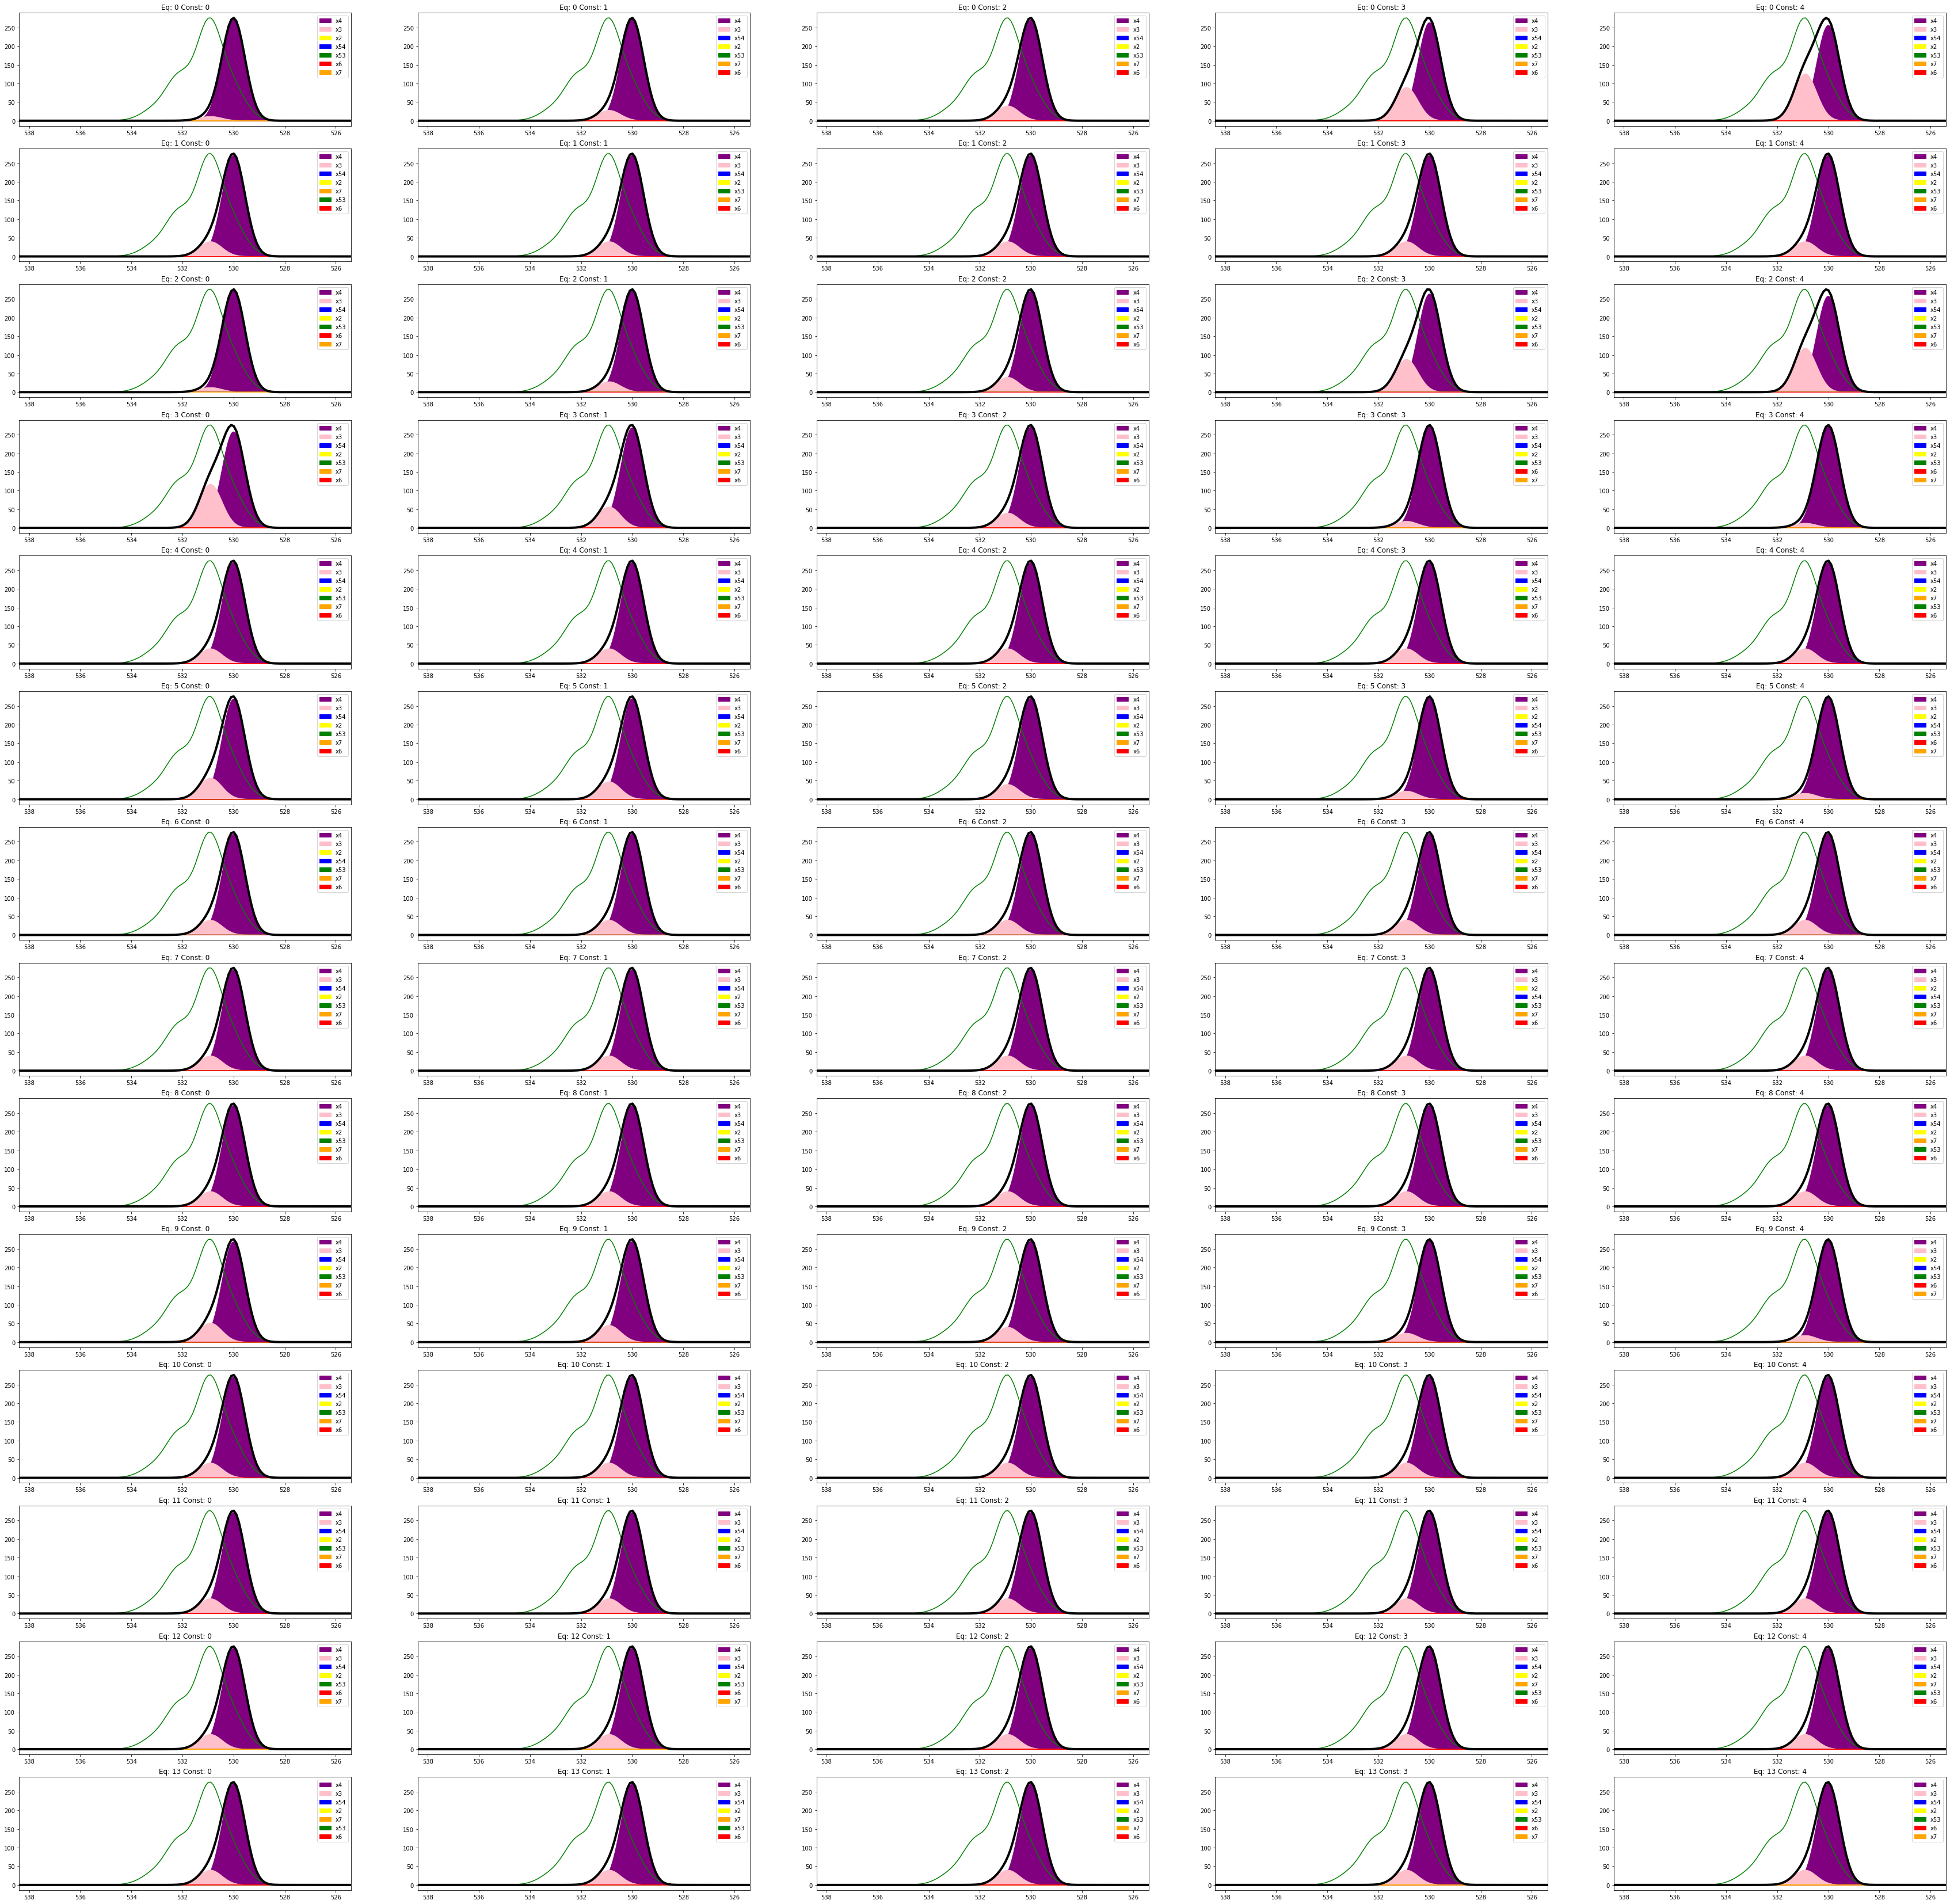

In [6]:
fig, axes = plt.subplots(nrows=14, ncols=5, figsize=(60,60))
for i in range(len(sols)):
    sols[i].plot_gaussian(envelope=True, resample_envelope=True, overlay=True, ax=axes[int(i/5), int(i%5)], title=('Eq: ' + str(int(i/5)) + ' Const: ' + str(i % 5)))
plt.show()

## RMSE

In [17]:
rmses_list = []
for i in range(len(default_rxn_consts)):
    rmses_list.append([])
    for j in range(5):
        rmses_list[i].append(sols[i*5 + j].rmse())
rmses = pd.DataFrame(rmses_list, columns=['0.1', '0.5', '1', '5', '10'])
rmses

,0.1,0.5,1,5,10
0,78.567874,75.769814,73.826851,66.171533,61.108089
1,73.827092,73.826985,73.826851,73.825780,73.824442
2,78.404766,75.759759,73.826851,66.410453,62.180535
3,62.329270,71.185789,73.826851,77.510733,78.404766
4,73.826728,73.826801,73.826851,73.826952,73.826975
5,71.087144,72.652613,73.826851,76.796969,77.804290
6,73.806281,73.824565,73.826851,73.828680,73.828909
7,73.827931,73.827451,73.826851,73.822054,73.816058
8,73.826631,73.826762,73.826851,73.827030,73.827070
9,72.020313,72.983646,73.826851,76.449362,77.485692


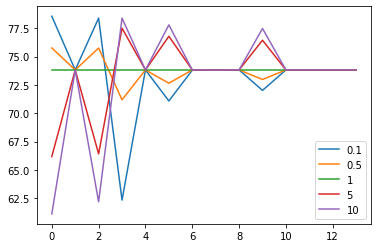

In [18]:
rmses.plot()

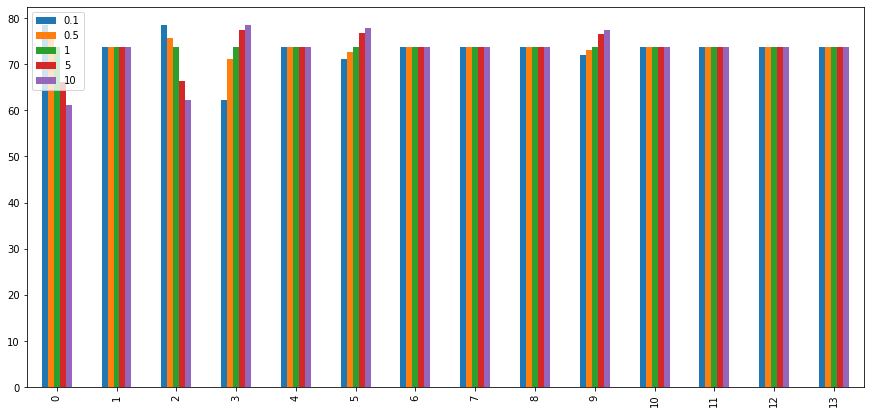

In [19]:
rmses.plot.bar(figsize=(15,7))

In [20]:
rmses_min = rmses.agg(['min', 'idxmin']).T
rmses_min

,min,idxmin
0.1,62.329270,3.0
0.5,71.185789,3.0
1,73.826851,0.0
5,66.171533,0.0
10,61.108089,0.0


3, 0.1


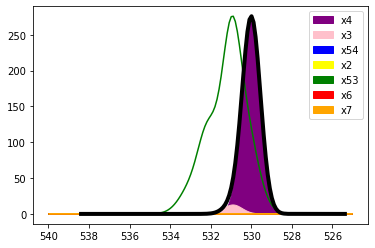

0, 1


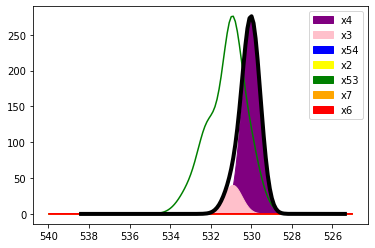

0, 10


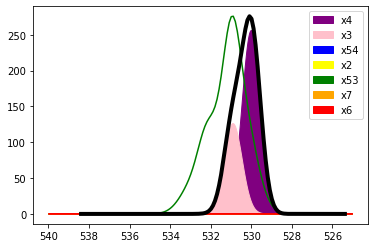

In [7]:
print('3, 0.1')
sols[10].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
print('0, 1')
sols[2].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
print('0, 10')
sols[4].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)

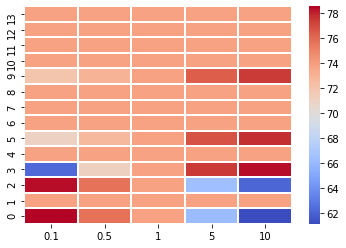

In [22]:
rmse_heatmap = sb.heatmap(rmses, cmap='coolwarm', linewidths=1)
rmse_heatmap.invert_yaxis()

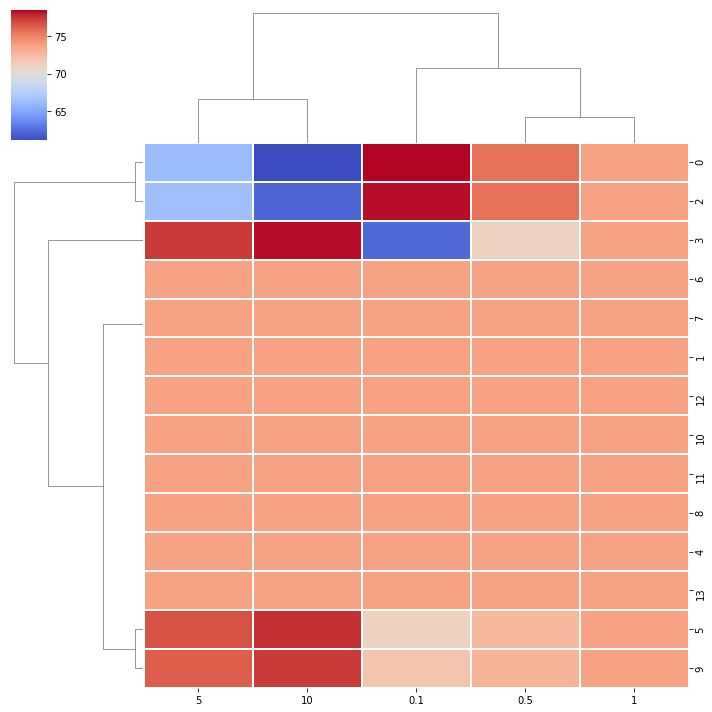

In [23]:
rmse_clustermap = sb.clustermap(rmses, cmap='coolwarm', linewidths=1)

## Between Integral Difference Comparison

In [6]:
integrals_list = []
for i in range(len(default_rxn_consts)):
    integrals_list.append([])
    for j in range(5):
        integrals_list[i].append(sols[i*5 + j].integral_diff_between())
integral_diffs = pd.DataFrame(integrals_list, columns=['0.1', '0.5', '1', '5', '10'])
integral_diffs

,0.1,0.5,1,5,10
0,537.831562,523.354195,512.985222,468.388505,435.901200
1,512.986763,512.986078,512.985222,512.978375,512.969815
2,536.992525,523.297469,512.985222,469.900052,442.741929
3,443.672130,498.387569,512.985222,532.412299,536.992516
4,512.984586,512.984963,512.985222,512.985743,512.985861
5,497.828966,506.573637,512.985222,528.722628,533.923956
6,512.820478,512.966915,512.985222,512.999869,513.001699
7,512.993866,512.990024,512.985222,512.946809,512.898795
8,512.983818,512.984651,512.985222,512.986364,512.986624
9,503.067533,508.391998,512.985222,526.916241,532.290098


In [7]:
integral_diffs_min = integral_diffs.agg(['min', 'idxmin']).T
integral_diffs_min

,min,idxmin
0.1,443.672130,3.0
0.5,498.387569,3.0
1,512.985222,0.0
5,468.388505,0.0
10,435.901200,0.0


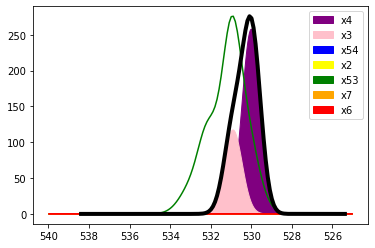

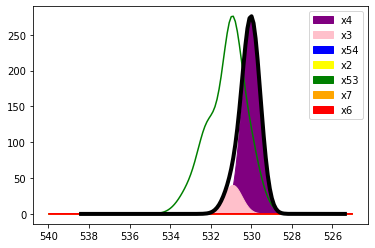

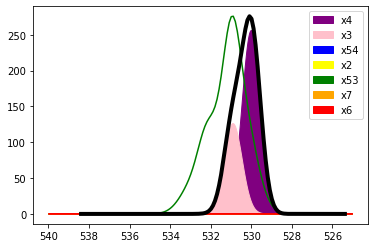

In [9]:
sols[15].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
sols[2].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)
sols[4].plot_gaussian(envelope=True, overlay=True, resample_envelope=True)